In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [10]:
data = np.array([18, 22, 25, 42, 27, 43]).reshape(-1, 1)

In [11]:
dist_matrix = squareform(pdist(data, metric='euclidean'))
print("Distance Matrix:\n", dist_matrix)

Distance Matrix:
 [[ 0.  4.  7. 24.  9. 25.]
 [ 4.  0.  3. 20.  5. 21.]
 [ 7.  3.  0. 17.  2. 18.]
 [24. 20. 17.  0. 15.  1.]
 [ 9.  5.  2. 15.  0. 16.]
 [25. 21. 18.  1. 16.  0.]]


### divisive clustering function

In [12]:
def divisive_clustering(data_points):
    clusters = [list(data_points)]  # start with all points in one cluster
    steps = []

    while any(len(c) > 1 for c in clusters):
        # find cluster with max range
        cluster_to_split = max(clusters, key=lambda x: max(x)-min(x))
        clusters.remove(cluster_to_split)

        # split at midpoint
        midpoint = (min(cluster_to_split) + max(cluster_to_split)) / 2
        left = [x for x in cluster_to_split if x <= midpoint]
        right = [x for x in cluster_to_split if x > midpoint]

        clusters.extend([left, right])
        steps.append((left, right))

    return clusters, steps

clusters, steps = divisive_clustering(data)

### step by step split

In [13]:
print("\nDivisive Clustering Steps:")
for i, (left, right) in enumerate(steps, 1):
    print(f"Step {i}: Split into {left} and {right}")



Divisive Clustering Steps:
Step 1: Split into [array([18]), array([22]), array([25]), array([27])] and [array([42]), array([43])]
Step 2: Split into [array([18]), array([22])] and [array([25]), array([27])]
Step 3: Split into [array([18])] and [array([22])]
Step 4: Split into [array([25])] and [array([27])]
Step 5: Split into [array([42])] and [array([43])]


### visulize dendogram as plot

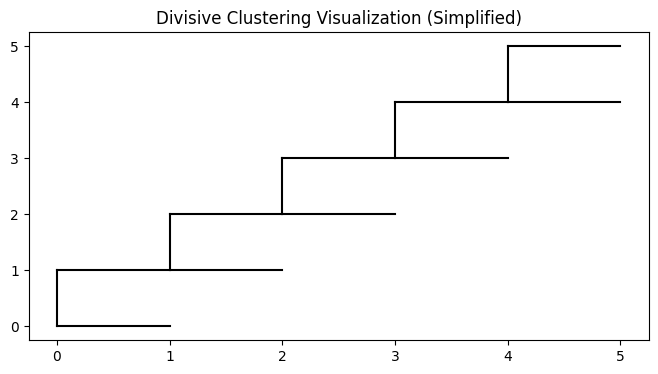

In [14]:
def plot_divisive_dendrogram(steps):
    fig, ax = plt.subplots(figsize=(8,4))
    y = 0
    for i, (left, right) in enumerate(steps):
        # plot vertical lines
        ax.plot([i, i], [y, y+1], 'k-')
        # plot horizontal lines for left and right clusters
        ax.plot([i, i+1], [y+1, y+1], 'k-')
        ax.plot([i, i+1], [y, y], 'k-')
        y += 1
    ax.set_title("Divisive Clustering Visualization (Simplified)")
    plt.show()

plot_divisive_dendrogram(steps)